<a href="https://colab.research.google.com/github/Krish080403/Predicting-Urbanization-using-XGBoost/blob/main/XGBoost_using_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gdal

In [ ]:
from osgeo import gdal
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def addNaNRow(input_array):
    new_row = np.empty((1, input_array.shape[1]))
    new_row[:] = np.nan
    input_array = np.append(input_array, new_row, axis=0)

    return input_array


def addNaNCol(input_array):
    new_col = np.empty((input_array.shape[0], 1))
    new_col[:] = np.nan
    input_array = np.append(input_array, new_col, axis=1)

    return input_array

In [ ]:
pathname = '/content/drive/MyDrive/AdjustedData_23_metre_Resolution/'

In [ ]:
# All features in X imported and read as Array

popden = gdal.Open(pathname+"popden.tif")
popden = popden.ReadAsArray()
popden = np.where(popden < 0 , np.nan, popden)
popden = addNaNRow(popden)
popden = addNaNCol(popden)

(l,w) = popden.shape
popden = np.reshape(popden, (l*w,1))

In [ ]:
Slope = gdal.Open(pathname+"slope.tif")
Slope = Slope.ReadAsArray()
Slope = np.where(Slope < 0, np.nan, Slope)
Slope = np.reshape(Slope, (l*w,1))

In [ ]:
Friction = gdal.Open(pathname+"friction.tif")
Friction = Friction.ReadAsArray()
Friction = np.where(Friction < 0 , np.nan, Friction)
Friction = np.reshape(Friction, (l*w,1))

In [ ]:
Elevation = gdal.Open(pathname+"elevation.tif")
Elevation = Elevation.ReadAsArray()
Elevation = np.where(Elevation < 0 , np.nan, Elevation)
Elevation = np.reshape(Elevation, (l*w,1))

In [ ]:
gdp2005 = gdal.Open(pathname+"gdp2005.tif")
gdp2005 = gdp2005.ReadAsArray()
gdp2005 = np.where(gdp2005 < 0 , np.nan, gdp2005)
gdp2005 = np.reshape(gdp2005, (l*w,1))

In [ ]:
gdp2011 = gdal.Open(pathname+"gdp2011.tif")
gdp2011 = gdp2011.ReadAsArray()
gdp2011 = np.where(gdp2011 < 0 , np.nan, gdp2011)

In [ ]:
gdp2015 = gdal.Open(pathname+"gdp2015.tif")
gdp2015 = gdp2015.ReadAsArray()
gdp2015 = np.where(gdp2015 < 0 , np.nan, gdp2015)

In [ ]:
floods = gdal.Open(pathname+"floods.tif")
floods = floods.ReadAsArray()
floods = np.where(floods < 0 , np.nan, floods)
floods = np.reshape(floods, (l*w,1))

In [ ]:
accessibility = gdal.Open(pathname+"accessibilty.tif")
accessibility = accessibility.ReadAsArray()
accessibility = np.where(accessibility < 0 , np.nan, accessibility)
accessibility = np.reshape(accessibility, (l*w,1))

In [ ]:
Temp2005 = gdal.Open(pathname+"Temp_2005.tif")
Temp2005 = Temp2005.ReadAsArray()
Temp2005 = addNaNRow(Temp2005)
Temp2005 = np.where(Temp2005 < 0 , np.nan, Temp2005)
Temp2005 = np.reshape(Temp2005, (l*w,1))

In [ ]:
Temp2011 = gdal.Open(pathname+"Temp_2011.tif")
Temp2011 = Temp2011.ReadAsArray()
Temp2011 = addNaNRow(Temp2011)
Temp2011 = np.where(Temp2011 < 0 , np.nan, Temp2011)
Temp2011 = np.reshape(Temp2011, (l*w,1))

In [ ]:
Temp2015 = gdal.Open(pathname+"Temp_2015.tif")
Temp2015 = Temp2015.ReadAsArray()
Temp2015 = addNaNRow(Temp2015)
Temp2015 = np.where(Temp2015 < 0 , np.nan, Temp2015)
Temp2015 = np.reshape(Temp2015, (l*w,1))

In [ ]:
Temp2020 = gdal.Open(pathname+"Temp_2020.tif")
Temp2020 = Temp2020.ReadAsArray()
Temp2020 = addNaNRow(Temp2020)
Temp2020 = np.where(Temp2020 < 0 , np.nan, Temp2020)
Temp2020 = np.reshape(Temp2020, (l*w,1))

In [ ]:
builtup_05_06 = gdal.Open(pathname+"05_06_builtup.tif")
builtup_05_06 = builtup_05_06.ReadAsArray()
builtup_05_06 = np.where(builtup_05_06 < 0 , np.nan, builtup_05_06)
builtup_05_06 = np.reshape(builtup_05_06, (l*w,1))

In [ ]:
builtup_11_12 = gdal.Open(pathname+"11_12_builtup_some.tif")
builtup_11_12 = builtup_11_12.ReadAsArray()
builtup_11_12 = np.where(builtup_11_12 < 0 , np.nan, builtup_11_12)
builtup_11_12 = np.reshape(builtup_11_12, (l*w,1))

In [ ]:
builtup_15_16 = gdal.Open(pathname+"15_16_builtup.tif")
builtup_15_16 = builtup_15_16.ReadAsArray()
builtup_15_16 = np.where(builtup_15_16 < 0 , np.nan, builtup_15_16)
builtup_15_16 = np.reshape(builtup_15_16, (l*w,1))

In [ ]:
builtup_20_21 = gdal.Open(pathname+"20_21_builtup.tif")
builtup_20_21 = builtup_20_21.ReadAsArray()
builtup_20_21 = np.where(builtup_20_21 < 0 , np.nan, builtup_20_21)
builtup_20_21 = addNaNCol(builtup_20_21)
builtup_20_21 = np.reshape(builtup_20_21, (l*w,1))

In [ ]:
#Opening and Reading Y data
# Subtracted Maps
Subtracted_Urban_11_05_data = gdal.Open(pathname+"Sub_11-05.tif")
Subtracted_Urban_11_05 = Subtracted_Urban_11_05_data.ReadAsArray()
Subtracted_Urban_11_05 = np.where(Subtracted_Urban_11_05 < 0 , 0, Subtracted_Urban_11_05)
Subtracted_Urban_11_05 = np.reshape(Subtracted_Urban_11_05, (l*w,1))

Subtracted_Urban_15_05_data = gdal.Open(pathname+"Sub_15-05.tif")
Subtracted_Urban_15_05 = Subtracted_Urban_15_05_data.ReadAsArray()
Subtracted_Urban_15_05 = np.where(Subtracted_Urban_15_05 < 0 , 0, Subtracted_Urban_15_05)
Subtracted_Urban_15_05 = np.reshape(Subtracted_Urban_15_05, (l*w,1))

Subtracted_Urban_21_11_data = gdal.Open(pathname+"Sub_21-11.tif")
Subtracted_Urban_21_11 = Subtracted_Urban_21_11_data.ReadAsArray()
Subtracted_Urban_21_11 = np.where(Subtracted_Urban_21_11 < 0 , 0, Subtracted_Urban_21_11)
Subtracted_Urban_21_11 = np.reshape(Subtracted_Urban_21_11, (l*w,1))

In [ ]:
Y_array = Subtracted_Urban_15_05
previousBuiltup = builtup_05_06
Temp = Temp2005
gdp = gdp2005

In [ ]:
assert Slope.shape == popden.shape == Friction.shape == Elevation.shape == gdp2005.shape == floods.shape == accessibility.shape ==Temp.shape
assert builtup_05_06.shape == builtup_11_12.shape == builtup_15_16.shape == builtup_20_21.shape == (l*w,1)

assert Subtracted_Urban_21_11.shape == Subtracted_Urban_11_05.shape == (l*w,1)


In [ ]:
def showFeatureMaps():
  fig, axes = plt.subplots(3, 3, figsize=(40, 15))
  sns.heatmap(ax=axes[0, 0], data=np.reshape(Slope,(l,w)), square=True, cmap="crest").set_title('Kamrup Slope')
  sns.heatmap(ax=axes[0, 1], data=np.reshape(Elevation,(l,w)), square=True, cmap="crest").set_title('Kamrup Elevation')
  sns.heatmap(ax=axes[0, 2], data=np.reshape(Friction,(l,w)), square=True, cmap="crest").set_title('Kamrup Friction')
  sns.heatmap(ax=axes[1, 0], data=np.reshape(accessibility,(l,w)), square=True, cmap="crest").set_title('Kamrup Accessibility')
  sns.heatmap(ax=axes[1, 1], data=np.reshape(popden,(l,w)), square=True, cmap="crest").set_title('Kamrup Population Density')
  sns.heatmap(ax=axes[1, 2], data=np.reshape(floods,(l,w)), square=True, cmap="crest").set_title('Kamrup Floods')
  sns.heatmap(ax=axes[2, 0], data=np.reshape(Temp,(l,w)), square=True, cmap="crest").set_title('Kamrup Temperature 2005')
  sns.heatmap(ax=axes[2, 1], data=np.reshape(Temp2015,(l,w)), square=True, cmap="crest").set_title('Kamrup Temperature 2015')
  sns.heatmap(ax=axes[2, 2], data=np.reshape(Temp2020,(l,w)), square=True, cmap="crest").set_title('Kamrup Temperature 2020')


In [ ]:
def showBuiltupMaps():
  fig, axes = plt.subplots(2, 3, figsize=(40, 10))
  sns.heatmap(ax=axes[0,0], data=np.reshape(builtup_05_06,(l,w)), cmap="crest").set_title('Kamrup Builtip 2005-06')
  sns.heatmap(ax=axes[0,1], data=np.reshape(builtup_11_12,(l,w)), cmap="crest").set_title('Kamrup Builtip 2011-12')
  sns.heatmap(ax=axes[0,2], data=np.reshape(builtup_15_16,(l,w)), cmap="crest").set_title('Kamrup Builtip 2015-2016')
  sns.heatmap(ax=axes[1,0], data=np.reshape(builtup_20_21,(l,w)), cmap="crest").set_title('Kamrup Builtip 2020-2021')

In [ ]:
# showFeatureMaps()

In [ ]:
# showBuiltupMaps()

In [ ]:
df = pd.DataFrame({
    'Slope': Slope.flatten(),
    'Elevation': Elevation.flatten(),
    'PopDen': popden.flatten(),
    'Friction': Friction.flatten(),
    'Floods': floods.flatten(),
    'Accessibility': accessibility.flatten(),
    'GDP': gdp.flatten(),
    'Previous_builtup': previousBuiltup.flatten(),
    'Temp':Temp.flatten(),
    'Y': Y_array.flatten(),
})

X = df.drop('Y', axis=1)
Y = df['Y']

In [ ]:
df.describe()

,Slope,Elevation,PopDen,Friction,Floods,Accessibility,GDP,Previous_builtup,Temp,Y
count,1.937682e+06,1.939210e+06,1.937869e+06,1.935703e+06,1.939194e+06,1.935918e+06,1.939170e+06,1.939268e+06,1.939176e+06,3.488477e+06
mean,8.600398e-01,8.232493e-01,1.338998e-01,8.634150e-01,8.882453e-01,7.862569e-01,1.821177e-01,1.292622e-01,5.588484e-01,2.022774e-02
std,1.367591e-01,1.472543e-01,1.862207e-01,1.828166e-01,2.511740e-01,1.607000e-01,2.751711e-01,3.354900e-01,1.685054e-01,1.407785e-01
min,7.491708e-02,0.000000e+00,0.000000e+00,1.926445e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.715124e-01,7.523553e-01,0.000000e+00,7.655186e-01,1.000000e+00,7.155893e-01,1.772051e-02,0.000000e+00,4.451104e-01,0.000000e+00
50%,9.176646e-01,9.030955e-01,5.982101e-02,9.616657e-01,1.000000e+00,8.263523e-01,4.634973e-02,0.000000e+00,5.684696e-01,0.000000e+00
75%,9.706095e-01,9.259758e-01,1.912388e-01,9.809301e-01,1.000000e+00,9.018762e-01,1.996024e-01,0.000000e+00,6.780782e-01,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
Temp = Temp2011
previousBuiltup = builtup_11_12
Y_array = Subtracted_Urban_21_11

df_eval = pd.DataFrame({
    'Slope': Slope.flatten(),
    'Elevation': Elevation.flatten(),
    'PopDen': popden.flatten(),
    'Friction': Friction.flatten(),
    'Floods': floods.flatten(),
    'Accessibility': accessibility.flatten(),
    'GDP': gdp.flatten(),
    'Previous_builtup': previousBuiltup.flatten(),
    'Temp':Temp.flatten(),
    'Y': Y_array.flatten(),
})
X_eval = df_eval.drop('Y', axis=1)
Y_eval = df_eval['Y']

In [ ]:
np.count_nonzero(Y_eval == .5)
# Y_eval

0

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .80)
evalset=[(X_eval,Y_eval)]

In [ ]:
params = {'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 5,
 'tree_method': 'gpu_hist'}
xgb_model=XGBRegressor(**params)
model=xgb_model.fit(X,Y, eval_set=evalset,verbose=True)

[0]	validation_0-rmse:0.47641
[1]	validation_0-rmse:0.45405
[2]	validation_0-rmse:0.43290
[3]	validation_0-rmse:0.41286
[4]	validation_0-rmse:0.39389
[5]	validation_0-rmse:0.37596
[6]	validation_0-rmse:0.35902
[7]	validation_0-rmse:0.34301
[8]	validation_0-rmse:0.32787
[9]	validation_0-rmse:0.31359
[10]	validation_0-rmse:0.30012
[11]	validation_0-rmse:0.28742
[12]	validation_0-rmse:0.27545
[13]	validation_0-rmse:0.26422
[14]	validation_0-rmse:0.25362
[15]	validation_0-rmse:0.24369
[16]	validation_0-rmse:0.23435
[17]	validation_0-rmse:0.22559
[18]	validation_0-rmse:0.21740
[19]	validation_0-rmse:0.20975
[20]	validation_0-rmse:0.20257
[21]	validation_0-rmse:0.19588
[22]	validation_0-rmse:0.18961
[23]	validation_0-rmse:0.18378
[24]	validation_0-rmse:0.17833
[25]	validation_0-rmse:0.17327
[26]	validation_0-rmse:0.16860
[27]	validation_0-rmse:0.16429
[28]	validation_0-rmse:0.16023
[29]	validation_0-rmse:0.15649
[30]	validation_0-rmse:0.15307
[31]	validation_0-rmse:0.14988
[32]	validation_0-

Import some metrics and checking models' score

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

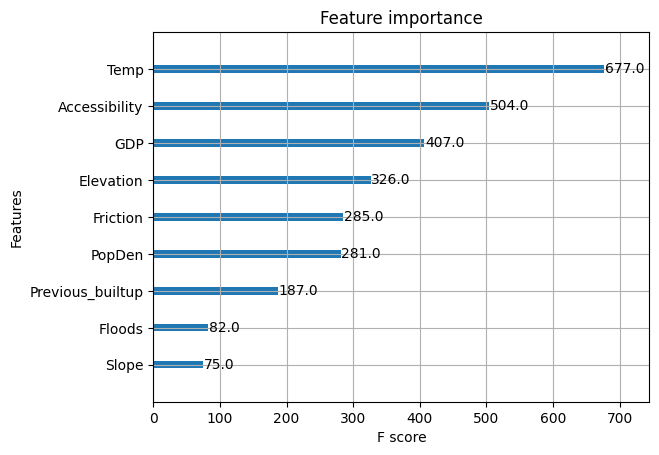

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model)

In [ ]:
threshold = 0.5
y_pred = model.predict(X_eval)
y_pred = np.clip(y_pred, 0, 1)
y_pred = np.where(y_pred >= threshold, 1, 0)
y_test = Y_eval.astype(int)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

print("f1_score = {}".format(f1_score(y_test, y_pred, average='macro')))
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("RMSE = {}".format(np.sqrt(MSE(y_test, y_pred))))

f1_score = 0.6009109740783735
Precision = 0.6790141686401914
Recall = 0.5714270524493812
Accuracy = 0.983405079064589
RMSE = 0.12882127516606515


In [ ]:
def write_geotiff(filename, arr1,in_ds):
    if arr1.dtype == np.float32:
        arr_type = gdal.GDT_Float32
    else:
        arr_type = gdal.GDT_Int32

    driver = gdal.GetDriverByName("GTiff")
    out_ds = driver.Create(filename, arr1.shape[1], arr1.shape[0], 1, arr_type)
    out_ds.SetProjection(in_ds.GetProjection())
    out_ds.SetGeoTransform(in_ds.GetGeoTransform())
    band = out_ds.GetRasterBand(1)
    band.WriteArray(arr1)
    # band = out_ds.GetRasterBand(2)
    # band.WriteArray(arr2)

    band.FlushCache()
    band.ComputeStatistics(False)

In [ ]:
def predictionMap(Temp, previousBuiltup, previousBuiltupGdalData ,threshold , showMaps=False, exportMaps=False ,actualSubtractedMap=None):

  df = pd.DataFrame({
      'Slope': Slope.flatten(),
      'Elevation': Elevation.flatten(),
      'PopDen': popden.flatten(),
      'Friction': Friction.flatten(),
      'Floods': floods.flatten(),
      'Accessibility': accessibility.flatten(),
      'GDP': gdp.flatten(),
      'Previous_builtup': previousBuiltup.flatten(),
      'Temp':Temp.flatten(),
  })

  y_prediction = model.predict(X)


  if(actualSubtractedMap):
    y_prediction_for_test = np.clip(y_prediction, 0, 1)
    y_prediction_for_test = np.where(y_prediction_for_test >= threshold, 1, 0)
    y_prediction_for_test = y_prediction_for_test.astype(int)

    print("f1_score = {}".format(f1_score(actualSubtractedMap, y_prediction_for_test, average='macro')))
    print("Precision = {}".format(precision_score(actualSubtractedMap, y_prediction_for_test, average='macro')))
    print("Recall = {}".format(recall_score(actualSubtractedMap, y_prediction_for_test, average='macro')))
    print("Accuracy = {}".format(accuracy_score(actualSubtractedMap, y_prediction_for_test)))
    print("RMSE = {}".format(np.sqrt(MSE(actualSubtractedMap, y_prediction_for_test))))

  if(showMaps):
    fig, axes = plt.subplots(1, 1, figsize=(10, 3))
    sns.heatmap(ax=axes, data=np.reshape(y_prediction,(l,w)).astype(np.float32), cmap="crest").set_title('Kamrup Urbanisation Zones Predicted 2030')

  y_prediction = np.clip(y_prediction, 0, 1)

  if(exportMaps):
    write_geotiff('2030_predicted_CV_params.tiff',np.reshape(y_prediction,(l,w)),previousBuiltupGdalData)


KeyboardInterrupt: ignored

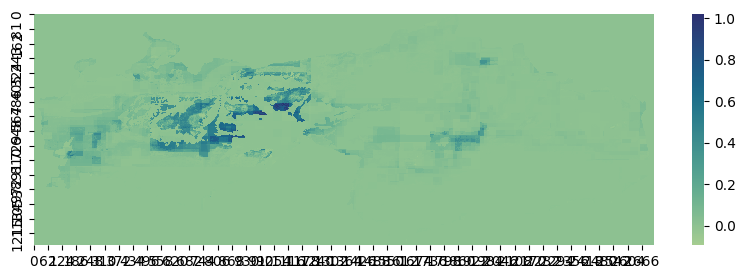

In [ ]:
predictionMap(Temp2020 , builtup_20_21 , Subtracted_Urban_21_11_data , 0.5, showMaps=True, exportMaps=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = XGBRegressor()
parameters = {
     "eta"    : [ .01 ,0.05, 0.10, 0.30],
     "max_depth"        : [ 5, 6, 8, 10],
    #  "min_child_weight" : [ 1, 3, 5 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    #  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "n_estimators"     : [10, 20, 30],
      'eval_metric':['rmse'],
     'tree_method':['gpu_hist'],
     }

grid = GridSearchCV(clf, parameters, n_jobs=7, cv=3, verbose=4)

In [ ]:
grid.fit(X, Y)
grid.best_params_